# Shock and Detonation Toolbox Tutorial

2019 US National Combustion Meeting Cantera Workshop  
March 24, 2019  

Joe Shepherd  
Graduate Aerospace Laboratories  
California Institute of Technology  
Pasadena, CA 91125 USA    

<a href="mailto:jeshep@caltech.edu">jeshep@caltech.edu</a>

### What is the SDT?
The Shock & Detonation Toolbox is an open-source software library that enables the solution of standard problems
    for gas-phase explosions using realistic thermochemistry
    and detailed chemical kinetics.
    The SD Toolbox uses the <a href="http://www.cantera.org/">Cantera</a>
    software package and is implemented as routines that can be called from either MATLAB or Python. A set of demonstration programs and a library of contemporary reaction mechanisms and thermodynamic data are provided.  
   
### How to download
The SDT home page is located on the <a href="http://shepherd.caltech.edu/EDL/">Explosion Dynamics Laboratory</a> site under the Public Resources page at http://shepherd.caltech.edu/EDL/PublicResources/sdt/

Python and Matlab libraries and demonstration programs can be downloaded as <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox.zip">(ZIP)</a> archives.   Installation instructions are available in a <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/sdt-install.pdf">(PDF)</a> file.

### Additional resources
* Quick reference to SDT functions and demonstation programs <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/doc/QuickReferenceSDT.pdf">(PDF)</a> 
* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/cti_mech.html"> Cantera format (.CTI) data sets </a>
* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/thermo.html">  Thermodynamic data sources and software tools </a>




# Toolbox Capabilities

   The SD Toolbox includes numerical routines for the computation of:
    <ul>
      <li> CJ detonation speed and post-detonation state
      <li> Postshock gas state for frozen composition
      <li> Postshock gas state for equilibrium composition
      <li> Frozen and equilibrium Hugoniot curves
      <li> Oblique shock waves, shock-expansion solutions
      <li> Shock tube and shock tunnel performance
      <li> Constant-volume explosion structure
      <li> ZND detonation structure
      <li> Effective activation energies and
       chemical time scales from detailed reaction mechanisms
      <li> Creating and modifying thermodynamic databases.
    </ul>


# 2018 Release 

This is the third update of the SDT since 2007 and is now compatible with Cantera 2.3 and 2.4, Python 3.5 and 3.6 and Matlab R2017b and R2018a.  Python 2.X versions are not available.
 
The SDT interfaces are similar to earlier versions, but the underlying routines have been restructured and the demonstration programs rewritten. Plotting and error control are now more flexible and additional demonstration programs have been added.   Programs that used earlier versions of the Matlab libraries will require some minor coding changes for certain routines.  The Python code base has been completely rewritten.

Both Matlab and Python versions of all demonstration programs are now available, in particular  shock and detonation structure programs are available as Python scripts.  The Python and Matlab code structures have been made as similar as possible.   The chemical reaction mechanisms and thermodynamic databases have been updated to reference contemporary reaction data sets.

Contributors: S. Browne, J. Ziegler, N. Bitter, B. Schmidt, J. Lawson, 
J. E. Shepherd 

# Components

## Libraries
The core Python and Matlab libraries which must be installed in the appropriate systems directories as described in the installation instructions

## Demonstration Programs
There are over 30 demonstration programs provided that illustrate how to use the libraries to solve various problems.  Both Python 3 and Matlab versions are available.  

## Cantera input (.cti) files
Reaction mechanism and associated thermodynamic data (.cti files) used by the demonstration programs are provided.

## Thermodynamics ultilities
Primary sources, references and programs for checking and fitting thermodynamic data are provided.  

# Fundamental Library Functions

Non-reactive shock wave.  

    PostShock_fr

Reactive shock wave. 

    PostShock_eq

Chapman-Jouguet (CJ) detonation.  

    CJSpeed

Reflected shock wave.  

    reflected_eq and reflected_fr

ZND detonation structure. 

    zndsolve

CV explosion structure.  

    cvsolve

# Shock Wave Physics  

Transformation from laboratory to wave frame  

<img src="images/shockframe.png" width="50%" alt="Laboratory and wave frame"/>   

\begin{align}
    \textrm{w}_1 &= \textrm{U}_s - \textrm{u}_1\\
    \textrm{w}_2 &= \textrm{U}_s - \textrm{u}_2
\end{align}  

Conservation or jump equations

Mass $$\rho_1 \textrm{w}_1 = \rho_2 \textrm{w}_2 $$

Momentum $$P_1 + \rho_1 \textrm{w}^2_1 = P_2 + \rho_2 \textrm{w}^2_2 $$

Energy $$ h_1 + \dfrac{\textrm{w}^2_1}{2} = h_2 + \dfrac{\textrm{w}^2_2}{2} $$

Entropy  $$ s_2 > s_1 $$  

Equation of state  (EoS)

$$ h(P, \rho, Y) \quad \textrm{or} \quad h(T, Y) \;\textrm{and} \;  P(\rho, T, Y)$$

Species mass fractions

$$  Y = (Y_1, Y_2, \dots, Y_k) $$

# Issues  
* Iterative solution required except for simplest EoS models (perfect gas)
* Chemical composition of downstream state
    * nonreactive,  frozen  $Y$ = constant
    * reactive, equilibrium $Y$ = $Y^{eq}(T,P,composition)$
    * varies with distance (ZND model)
* Limits on solutions for shocks
    * upstream state supersonic $\textrm{w}_1$ $>$ $a_1$
    * downstream state subsonic for nonreactive case
    * solutions multivalued for reactive case, require $\textrm{w}_1$ $>$ $\textrm{w}_{min}$

# Ideal gas model  

The methods in the SDT can be used with any equation of state but the current implmentation is specific to ideal gases.  

\begin{align}
    P  &= \rho RT \\
    R & = \dfrac{\mathcal{R}}{\overline{W}}\\
    \overline{W} & = \left(\sum_{i=1}^K \dfrac{Y_i}{W_i} \right)^{-1}\\
    h & = \sum_{i=1}^K Y_i h_i(T) \; \label{eq:h-sum}\\
    h_i & = \Delta_f h_i + \int_{T_\circ}^T c_{P, i}(T') \; dT'
\end{align}

All quantities are computed from the Cantera gas object using thermodynamic properties in .cti file

# Graphical Interpretation  
Rayleigh Line  

\begin{align}
 P_2 &= P_1 - \rho^2_1\textrm{w}_1^2 \left(v_2-v_1\right)\label{eq:RL} \\
\dfrac{P_2 - P_1}{v_2-v_1} = \dfrac{\Delta P}{\Delta v} &= - \left(\dfrac{\textrm{ w}_1}{v_1}\right)^2 =
    - \left(\dfrac{\textrm{w}_2}{v_2}\right)^2 \label{eq:Rayleigh-slope}
\end{align}


Hugoniot or Shock Adiabat  

\begin{align}
    h_2 - h_1 &= (P_2 - P_1)\dfrac{(v_2 + v_1)}{2}  \label{eq:RH1}\\
    e_2 - e_1 & = \dfrac{(P_2 + P_1)}{2}(v_1 - v_2) \label{eq:RH2}
\end{align}



# Hugoniot and Rayleigh line  

Example: Shock wave in air (frozen),  $U_s$ = 1000 m/s

<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_RH_air.py">demo_RH_air.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_RH_air.m">demo_RH_air.m</a> 

<img src="images/air-shock-1000.png"  width="50%" alt="P-V diagram, air shock  1000 m/s"/>

## Nonreactive Shock waves

Matlab: 
<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/SDToolbox/PostShock/PostShock_fr.m">PostShock_fr.m </a> 
Python: PostShock_fr in <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/sdtoolbox/postshock.py">PostShock.py</a> 

Calculates frozen post-shock state for a specified shock velocity, pressure, temperature,
and composition and gas object.

FUNCTION SYNTAX:  

    [gas] = PostShock_fr(U1,P1,T1,q,mech)  
    
INPUT:  

    U1 = shock speed (m/s)  
    P1 = initial pressure (Pa)  
    T1 = initial temperature (K)  
    q = reactant species mole fractions in one of Cantera's recognized formats  
    mech = cti file containing mechanism data (e.g. 'gri30.cti')  
    
OUTPUT:  

    gas = gas object at frozen post-shock state

## Reactive Shock waves

Equilibrium postshock state

Matlab: 
<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/SDToolbox/PostShock/PostShock_eq.m">PostShock_eq.m </a> 
Python: PostShock_eq in <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/sdtoolbox/postshock.py">PostShock.py</a> 

Calculates equilibrium post-shock state for a specified shock velocity, pressure, temperature, and composition and gas object.

FUNCTION SYNTAX:  

    [gas] = PostShock_eq(U1,P1,T1,q,mech)  
    
INPUT:  

    U1 = shock speed (m/s)  
    P1 = initial pressure (Pa)  
    T1 = initial temperature (K)  
    q = reactant species mole fractions in one of Cantera's recognized formats  
    mech = cti file containing mechanism data (e.g. 'gri30.cti')  
    
OUTPUT:  

    gas = gas object at frozen post-shock state

# Example with endothermic shock  

Shock wave in air (frozen vs equilibrium),  $U_s$ < 3500 m/s  
<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_RH_air_eq.py">demo_RH_air_eq.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_RH_air_eq.m">demo_RH_air_eq.m</a>

Uses <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/cti/airNASA9ions.cti">airNASA9ions.cti</a> high-temperature thermodynamic data (20,000 K) with molecules, atoms and ions.

<img src="images/air-shock-3500.png"  width="50%" alt="P-V diagram, air shock  1000 m/s"/>


# Solution Method 
The solution method is based on an iterative solution of the jump conditions in the following form:  

$$ \mathcal{H} = \left(h_2+\dfrac{1}{2}\textrm{w}_2^2\right)
    - \left(h_1+\dfrac{1}{2}\textrm{w}_1^2\right) $$  
$$ \mathcal{P} = \left(P_2 + \rho_2\textrm{w}_2^2\right) - \left(P_1 + \rho_1\textrm{ w}_1^2\right)$$  

The exact solution to the jump conditions then occurs when both $\mathcal{H}$ and $\mathcal{P}$
are identically zero.  We can construct an approximate solution by simultaneously iterating these two
equations until $\mathcal{H}$ and $\mathcal{P}$ are less than a specified tolerance. An iteration algorithm
can be developed by considering trial values of $(T, v)$ for the downstream thermodynamic state 2 that are
close to but not equal to the exact solution,  $(T_2, v_2)$.  The expansion of $\mathcal{P}$ and
$\mathcal{H}$ to first order in a Taylor series about the exact solution yields:  

$$ \mathcal{H}(T,v) =  \mathcal{H}(T_2,v_2) + \dfrac{\partial \mathcal{H}}{\partial T}(T-T_2) + \dfrac{\partial \mathcal{H}}{\partial v}(v-v_2) + \ldots $$

$$ \mathcal{P}(T,v)  = \mathcal{P}(T_2,v_2) + \dfrac{\partial \mathcal{P}}{\partial T}(T-T_2) + \dfrac{\partial \mathcal{P}}{\partial v}(v-v_2) + \ldots $$

## Numerical method
The solver uses the Newton-Raphson scheme (see Press,et al. Numerical Recipes) with the variables temperature and specific volume.  The scheme  is an extension of the method used by Reynolds (1986) in STANJAN to solve the jump conditions for a Chapman-Jouguet detonation. Truncating the Taylor series expansions, the residuals computation can be represented as the matrix operation  

$$
\left(\begin{array}{c}
\mathcal{H}\\\
\mathcal{P}
\end{array}\right)
= \left(\begin{array}{cc} 
        \dfrac{\partial \mathcal{H}}{\partial T} & \dfrac{\partial \mathcal{H}}{\partial v}\\\ 
        \dfrac{\partial \mathcal{P}}{\partial T} & \dfrac{\partial \mathcal{P}}{\partial v} 
        \end{array}\right) 
\left(\begin{array}{c} 
      \delta T\\\
      \delta v  
    \end{array}
      \right) $$  
      
where $\delta T$ = $T-T_2$ and $\delta v$ = $v-v_2$.  This equation is used to relate the corrections,
$\delta T$ and $\delta v$, to the current values of $(T, v)$ and through successive applications, approach the
true solution to within a specified error tolerance.  At step $i$, we have values $(T^i, v^i)$ which we use to
evaluate $\mathcal{H}$ and $\mathcal{P}$ to obtain $\mathcal{H}^i$ and $\mathcal{P}^i$; then we solve for $\delta T^i$ and $\delta v^i$  and compute the next approximation to the solution as

$$
\begin{array}{cc}
T^{i+1} &= T^i - \delta T^i \\\
v^{i+1} &= v^i - \delta v^i
\end{array}
$$

The corrections can be formally obtained by inverting the Jacobian  

$$ J = \left(\begin{array}{cc} \dfrac{\partial \mathcal{H}}{\partial T} & \dfrac{\partial \mathcal{H}}{\partial v}\\\
    \dfrac{\partial \mathcal{P}}{\partial T} & \dfrac{\partial \mathcal{P}}{\partial v}\\ \end{array}\right) $$  
    
and carrying out the matrix multiplication operation.

\begin{equation} \left(\begin{array}{c} \delta T\\\ \delta v \end{array}\right) = J^{-1} \left(\begin{array}{c} \mathcal{H}\\\ \mathcal{P} \end{array}\right) \end{equation}  

The derivatives needed to form the Jacobian are computed using finite differences. 

# Algorithm  

* Define known quantities: Upstream State ($P_1$, $\rho_1$, $T_1$, $h_1$, $\textrm{ w}_1$, $\overline{W}$), $\mathcal{R}$, error tolerances, increment values ($\Delta T$, $\Delta v$)

* Seek unknown quantities: Downstream State ($P_2$, $\rho_2$, $T_2$, $h_2$)

* Establish preliminary guess ($i=1$)  

\begin{align}
    \rho^i_2 &= 5\rho_1\\
    v^i_2 &= \dfrac{1}{\rho^i_2}\\
    P^i_2 &= P_1 + \rho_1\textrm{w}_1^2\left(1-\dfrac{\rho_1}{\rho^i_2}\right)\\
    T^i_2 &= T_1\dfrac{P_1}{P^i_2}\dfrac{\rho_2^i}{\rho_1}
\end{align}

* Evaluate residuals $\mathcal{H}$ and $\mathcal{P}$  

    * For frozen computations, hold composition of state 2 fixed and equal to state 1.  For equilibrium computations, find equilibrium state 2 for specified initial composition and $(T_2, v_2)$.  
    
    * Compute $\mathcal{H}(T_2^i, v_2^i)$ and $\mathcal{P}(T_2^i, v_2^i)$  

    * Perturb temperature holding volume fixed and compute $\mathcal{H}(T_2^i+\Delta T)$ and $\mathcal{P}(T_2^i+\Delta T)$  

    * Perturb specific volume holding temperature fixed and compute $\mathcal{H}(v_2^i+\Delta v)$ and $\mathcal{P}(v_2^i+\Delta v)$  

# Alogorithm (continued)

* Evaluate the elements of the approximate Jacobian $\tilde{J}$ by first order differences

\begin{align}
\dfrac{\partial \mathcal{H}}{\partial T} &\approx \dfrac{\mathcal{H}(T_2^i+\Delta T)-\mathcal{H}(T_2^i)}{\Delta T}\\
\dfrac{\partial \mathcal{P}}{\partial T} &\approx \dfrac{\mathcal{P}(T_2^i+\Delta T)-\mathcal{P}(T_2^i)}{\Delta T}\\
\dfrac{\partial \mathcal{H}}{\partial v} &\approx \dfrac{\mathcal{H}(v_2^i+\Delta v)-\mathcal{H}(v_2^i)}{\Delta v}\\
\dfrac{\partial \mathcal{P}}{\partial v} &\approx \dfrac{\mathcal{P}(v_2^i+\Delta v)-\mathcal{P}(v_2^i)}{\Delta v}
\end{align}

* Update the post-shock state 

\begin{equation} 
\left(\begin{array}{c} T_2\\\  v_2 \end{array}\right)^{i+1} =  \left(\begin{array}{c} T_2\\\  v_2 \end{array}\right)^{i} - \tilde{J}^{-1} \left(\begin{array}{c} \mathcal{H}\\\ \mathcal{P} \end{array}\right)^i 
\end{equation}

*  Check convergence

\begin{align*}
    |T_2^{i+1}-T_2^i| &< T_{error}\\
    |v_2^{i+1}-v_2^i| &< v_{error}
\end{align*}

# Reflected Shock Waves  

Frozen:  Matlab: 
<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/SDToolbox/Reflections/reflected_fr.m">reflected_fr.m </a> 
Python: reflected_fr in <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/sdtoolbox/reflections.py">PostShock.py</a> 

Equilibrium:  Matlab: 
<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/SDToolbox/Reflections/reflected_eq.m">reflected_eq.m </a> 
Python: reflected_eq in <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/sdtoolbox/reflections.py">PostShock.py</a>   


<img src="images/reflectiondiagram.png"  width="50%" alt="reflection of shock or detonation"/> 

Transformation from laboratory frame to shock frame

\begin{align}
    \textrm{w}_2 &= \textrm{U}_R+\textrm{u}_2\\
    \textrm{w}_3 &= \textrm{U}_R  \\
\end{align}
 
Resulting conservation (jump) equations for reflected shock

\begin{align}
  (\textrm{U}_R+\textrm{u}_2)\rho_2 &= \textrm{U}_R\,\rho_3 \\
    P_2  + \rho_2 (\textrm{U}_R+\textrm{u}_2)^2 &= P_3 + \rho_3 \textrm{U}_R^2 \\
    h_2 + \dfrac{1}{2} (\textrm{U}_R+\textrm{u}_2)^2 &= h_3 + \dfrac{1}{2} \textrm{U}_R^2 \\
    h_3 &= h_3(P_3,\rho_3, {\bf Y}_3) \\
\end{align}

Solution for state 3

\begin{align}
\textrm{U}_R &= \dfrac{\textrm{u}_2}{\dfrac{\rho_3}{\rho_2} -1} \\
P_3 &=  P_2 + \dfrac{\rho_3 \textrm{u}_2^2}{\dfrac{\rho_3}{\rho_2} -1} \\
h_3 &= h_2 + \dfrac{\textrm{ u}_2^2}{2}\dfrac{\dfrac{\rho_3}{\rho_2}+1}{\dfrac{\rho_3}{\rho_2}-1}
\end{align}

# Reflection of shock wave  

<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_reflected_eq.py">demo_reflected_eq.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_reflected_eq.m">demo_reflected_eq.m</a>  

Define namespaces and import modules

In [1]:
import cantera as ct
from sdtoolbox.postshock import PostShock_fr
from sdtoolbox.reflections import reflected_fr
from sdtoolbox.thermo import soundspeed_fr

Define incident state and gas objects for states 1, 2, 3

In [2]:
P1 = 100000; T1 = 300; P1atm = P1/ct.one_atm
q = 'H2:2 O2:1 N2:3.76' 
mech = 'Mevel2017.cti'             
gas1 = ct.Solution(mech)
gas1.TPX = T1, P1, q
gas2 = ct.Solution(mech)
gas3 = ct.Solution(mech)

Set incident shock wave Mach number $M_s > 1$

In [3]:
a_fr = soundspeed_fr(gas1)
UI = 3*a_fr
print('Incident shock speed UI = %.2f m/s' % (UI))

Incident shock speed UI = 1226.22 m/s


Compute postshock state behind incident shock

In [4]:
gas2 = PostShock_fr(UI, P1, T1, q, mech);
P2 = gas2.P/ct.one_atm;

print ('Frozen Post-Incident-Shock State')
print ('T2 = %.2f K, P2 = %.2f atm' % (gas2.T,P2))


Frozen Post-Incident-Shock State
T2 = 790.68 K, P2 = 10.28 atm


compute reflected shock post-shock state gas3

In [5]:
[p3,UR,gas3]= reflected_fr(gas1,gas2,gas3,UI);
P3 = gas3.P/ct.one_atm
print ('Frozen Post-Reflected-Shock State')
print ('T3 = %.2f K,  P3 = %.2f atm' % (gas3.T,P3))
print ("Reflected Wave Speed = %.2f m/s" % (UR))

Frozen Post-Reflected-Shock State
T3 = 1332.58 K,  P3 = 51.54 atm
Reflected Wave Speed = 463.44 m/s


For equilibrium post-shock states, procedure is the same, subsitute PostShock_eq, reflected_eq  for frozen routines.  See 
<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_reflected_fr.py">demo_reflected_fr.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_reflected_fr.m">demo_reflected_fr.m</a>  

Reflection of detonation waves follows the same procedure, compute incident wave speed with CJspeed, post-CJ state with PostShock_eq.  See
<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_CJ_and_shock_state.py">demo_CJ_and_shock_state.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_CJ_and_shock_state.m">demo_CJ_and_shock_state.m</a>  



# Exothermic Shock Waves - Detonations  

Multivalued solutions to jump conditions, two branches

* detonation, supersonic waves, compressed final state
* deflagration, subsonic waves, expanded final state

<img src="images/CJ2b.png"  width="50%" alt="P-V exothermic solutions, detonation and deflagration"/> 

Detonation branch has minimum wave speed for solution, $\textrm{w}_1 > \textrm{U}_\textrm{CJ}$

<img src="images/CJ3a.png"  width="50%" alt="P-V detonation solutions"/> 

# Computing CJ speed  

<img src="images/cj-isentrope.png"  width="50%" alt="detonation solutions with isentropes"/> 
<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_RH_CJ_isentropes.py">demo_RH_CJ_isentropes.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_RH_CJ_isentropes.m">demo_RH_CJ_isentropes.m</a>

Equivalent conditions for CJ condition

* Wave speed is a minimum for solutions to exist

$$ \textrm{w}_{1, \textrm{min}}  = \textrm{U}_\textrm{CJ}$$  

* Rayleigh line and shock adiabat (Hugoniot) are tangent  

$$ \left.\dfrac{\partial P}{\partial v}\right|_{\mathcal{H}, \textrm{CJ}} =
    \left.\dfrac{\Delta P}{\Delta v}\right|_\textrm{CJ} $$  
    
* Isentropes (equilibrium) are tangent to shock adiabat (Hugoniot)  

$$\left.\dfrac{\partial P}{\partial v}\right|_{\mathcal{H}, \textrm{CJ}} =
    \left.\dfrac{\partial P}{\partial v}\right|_{s, \textrm{CJ}} $$ 
    
* Entropy (equilibrium state computation) is local minimum $s_3 > s_2  >  s_1$

$$ \left.\dfrac{\partial s}{\partial v}\right|_{\mathcal{H}, \textrm{CJ}}  = 0 \quad \left.\dfrac{\partial^2 s}{\partial v^2}\right|_{\mathcal{H}, \textrm{CJ}} > 0$$

* Downstream speed (wave frame) is sonic w.r.t. equilibrium sound speed

$$ \textrm{w}_2 = a_2^{eq} \qquad  a^{eq}_2 = - v^2 \left(\dfrac{\partial P}{\partial v }\right)_{s, eq} $$

# Chapman-Jouguet Speed 

Calculate detonation Chapman-Jouguet (CJ) speed based on the
initial gas state and the minimum wave speed method.  Alogrithm computes solutions to equilibrium shock adiabat (Hugoniot) for range of states bracketing CJ point.  Newton-Raphson method is used with variables $(T_2, \textrm{w}_1)$ to find $\textrm{w}_1(v_2)$.  The minimum wave speed if found by fitting a parabola to an array of $\textrm{w}_1$ vs $\rho_2/\rho_1$ results and determining the minimum analytically.   Theoretical analyis of CJ point shows this variation in wave speed is quadratic in volume difference from CJ point

$$     \textrm{w}_1 - \textrm{w}_{1,\textrm{CJ}} = \dfrac{\textrm{w}_{1,\textrm{CJ}}}{4(P_2-P_1)}P_{2\mathcal{H},vv}\left(v_2 - v_{2, \textrm{CJ}} \right)^2  $$


See 
<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_CJ.py">demo_CJ.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_CJ.m">demo_CJ.m</a>  

In [6]:
import cantera as ct
from sdtoolbox.postshock import CJspeed
from sdtoolbox.utilities import CJspeed_plot

## Initial state specification:
$P_1$ = Initial Pressure  
$T_1$ = Initial Temperature  
$U$ = Shock Speed  
$q$ = Initial Composition  
mech = Cantera mechanism File name 

In [7]:
P1 = 100000 
P1atm = P1/ct.one_atm
T1 = 300
U = 2000
q = 'H2:2 O2:1 N2:3.76'
mech = 'Mevel2017.cti'
gas = ct.Solution(mech)

## Compute CJ speed

In [8]:
[cj_speed,R2,plot_data] = CJspeed(P1, T1, q, mech, fullOutput=True)
dratio_cj = plot_data[2]

## Outputs:
 cj_speed - detonation speed  
 R2 - R-squared value of wave speed - density fit 
 plot_data - further values relating to the fit procedure 

In [9]:
print('CJ computation for '+mech+' with composition '+q)
print('CJ speed '+str(round(cj_speed,4))+' (m/s)'+' Density ratio '+str(round(dratio_cj,4))+' R-squared '+str(round(R2,8)))

CJ computation for Mevel2017.cti with composition H2:2 O2:1 N2:3.76
CJ speed 1967.8455 (m/s) Density ratio 1.8042 R-squared 0.99999991


## diagnostic plots 


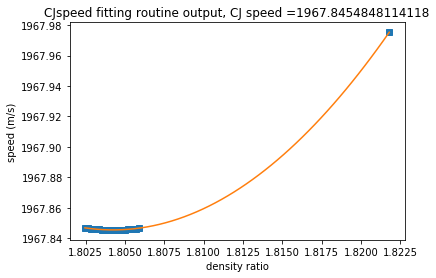

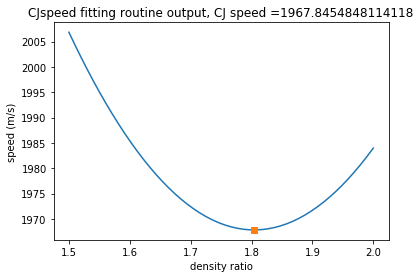

In [10]:
CJspeed_plot(plot_data,cj_speed)

# Detonation modeling 

The conventional model of unsteady detonation is by the Euler equations

\begin{align}
\dfrac{\partial}{\partial t}\rho + \nabla \cdot (\rho {\bf u})%
&=0\label{unsteady_mass_eqn}\\
\dfrac{\partial}{\partial t}(\rho {\bf u}) + \nabla\cdot(\rho{\bf u}\otimes {\bf u}
+ {\bf I}P)%
&=0 \label{unsteady_mom_eqn}\\
\dfrac{\partial}{\partial t}\rho (e + \dfrac{|{\bf u}|^2}{2})%
+ \nabla\cdot\rho{\bf u}(h + \dfrac{|{\bf u}|^2}{2}) &=0\label{unsteady_energy_eqn}\\
\dfrac{\partial}{\partial t}(\rho Y_k) + \nabla \cdot (\rho {\bf u} Y_k) &=%
\mathcal{W}_k\dot{\omega}_k \qquad (k=1,\dots, K) 
\end{align}

In terms of the material derivative, 

$$\dfrac{\textrm{D} }{\textrm{D} t} = {\partial/\partial t} + {\bf u}\cdot\nabla $$  

these are:  

\begin{align}
\dfrac{\textrm{D} \rho}{\textrm{D} t} &= -\rho \nabla\cdot{\bf u}\\
\dfrac{\textrm{D} {\bf u}}{t} &= -\dfrac{1}{\rho} \nabla P\\
\dfrac{\textrm{D} h }{\textrm{D} t} &= \dfrac{1}{\rho} \dfrac{\textrm{D} P}{\textrm{D} t}\\
\dfrac{\textrm{D}  Y_k}{\textrm{D} t} &= {1\over\rho} \mathcal{W}_k\dot{\omega}_k\qquad (k=1,\dots, K)
\end{align}  

# ZND Model

The ZND model considers a motion that is one-dimensional and steady in the wave frame.    

$$ \dfrac{\partial }{\partial t } = 0 \; \textrm{and} \;  \nabla = \dfrac{\textrm{d} }{\textrm{d} x} \; \rightarrow \dfrac{\textrm{D} }{\textrm{D} t} = \textrm{w}\dfrac{\textrm{d} }{\textrm{d} x}  =  \dfrac{\textrm{d} }{\textrm{d} t} $$  

Defining themicity

$$   \dot{\sigma} =  \sum_{k=1}^K \left( \dfrac{W}{{W}_k}
  - \dfrac{h_k}{c_p T}  \right) \dfrac{\textrm{d}Y_k}{\textrm{d} t}$$

and the sonic parameter (based on the frozen sound speed $a_{fr}$)

$$ \eta = 1 - \textrm{w}^2/a_{fr}^2  = 1 - M_2^2$$

the resulting model can be rewritten in terms of a set of ordinary differential equations  (ODEs)

\begin{align}
\dfrac{\textrm{d} P}{\textrm{d} t} & = -\rho \textrm{w}^2\dfrac{\dot{\sigma}}{{\eta}}\\
\dfrac{\textrm{d}\rho}{\textrm{d} t} &= -\rho \dfrac{\dot{\sigma}}{\eta}\\
\dfrac{\textrm{d}\textrm{w}}{\textrm{d} t} &= w \dfrac{\dot{\sigma}}{\eta}\\
\dfrac{\textrm{d}Y_k}{\textrm{d} t} &= \dfrac{W_k \dot{\omega}_k}{\rho} \qquad (k=1,\dots, K)
\end{align}  


# ZND model equivalence

The ZND model is equivalent to steady flow in a constant area, adiabatic flow.  The differential equation formulation is mathematically equivalent to the differential-algebraic equation (DAE) set conserving mass, momentum and energy using the jump conditions as each point in the downstream flow

\begin{align}
\rho \textrm{w} & = \rho_1 w_1 \\
P + \rho \textrm{w}^2  & = P_1 + \rho_1 \textrm{w}_1^2 \\
h + \dfrac{1}{2}\textrm{w}^2 & = h_1 + \dfrac{1}{2}\textrm{w}_1^2
\end{align}  

and computing the change in chemical composition with distance downstream from the shock.  

$$ \textrm{w}\dfrac{\textrm{d}Y_k}{x} = \dfrac{W_k \dot{\omega}_k}{\rho} \qquad (k=1,\dots, K) $$
Following a parcel of gas downstream from the shock the distance traveled and time elapsed are related by integrating distance along the stream line.

$$\dfrac{\textrm{d} x}{\textrm{d} t}  = \textrm{w}$$

# Initial conditions for ZND model  

The initial conditions for a znd computation have to be consistent with a compressible one-dimensional flow.  The standard way to insure this is to solve the frozen (non-reactive) shock jump conditions with specified upstream state $(P, \rho, \textrm{w}, {\bf Y})_1$.   The state downstream of the shock is $(P, \rho, \textrm{w}, {\bf Y})_2$, will be the initial conditions for starting the ODE or DAE solution.  In detonation modeling the state 2 is referred as the von Neumann  (vN) condition and the ZND solution is computed as follows for a CJ detonation:

* Define initial state  $(P, \rho, \textrm{w}, {\bf Y})_1$ of fuel-oxidizer-diluent mixture
* Compute CJ shock speed $\textrm{U}_\textrm{CJ}$  using CJspeed function
* Compute frozen postshock conditions corresponding to a nonreactive shock wave with $\textrm{w}$ = $\textrm{U}_\textrm{CJ}$
* Evaluate gas properties from gas object corresponding to postshock state 2 returned by PostShock_fr
* Integrate from state 2 toward state 3
* Solutions that extend to state 3 are only possible for certain exothermic cases  


* CJ detonations $\textrm{w}_1$ = $\textrm{U}_\textrm{CJ}$  
<img src="images/zndpath.png"  width="50%" alt="Hugoniots and Rayleigh line for CJ case"/>

<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_RH.py">demo_RH.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_RH.m">demo_RH.m</a>  



* Overdriven detonations  $w_1$ $>$ $\textrm{U}_\textrm{CJ}$
<img src="images/zndpath2.png"  width="50%" alt="Hugoniots and Rayleigh line for CJ case"/> 
* Exothermic cases may be singular if $\eta$ $\rightarrow$ 0 in the interior of the domain unless  $\dot{\sigma}$ vanishes simultaneously - known as an eigenvalue detonation.    Usually occurs when $w_1$ $<$ $\textrm{U}_\textrm{CJ}$ and in certain cases for CJ detonations, see Fickett and Davis, Detonation or Lee, The Detonation Phenomenon. 
* Endothermic cases are not ordinarily singular

# ZND Example

See 
<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_CJ.py">demo_ZNDCJ.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_CJ.m">demo_ZNDCJ.m</a>  

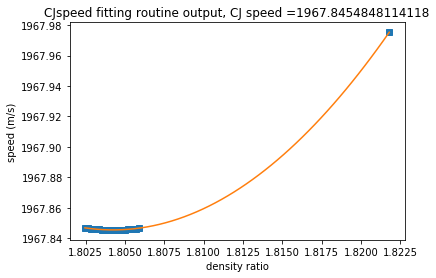

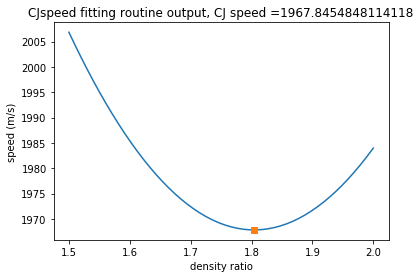

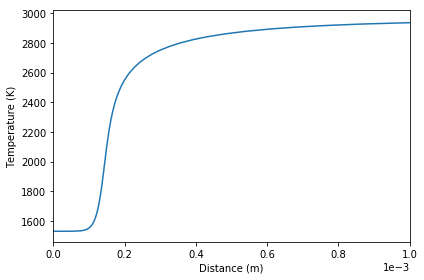

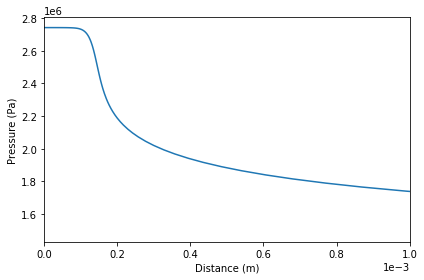

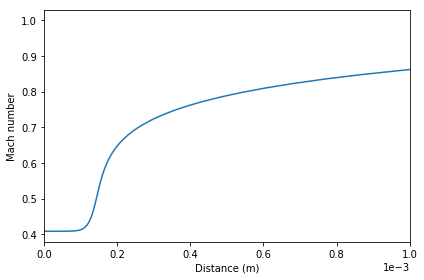

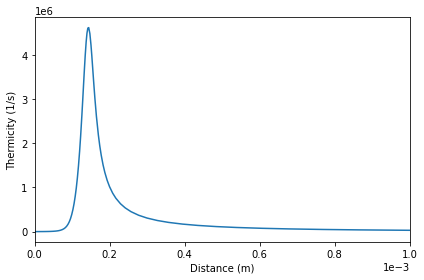

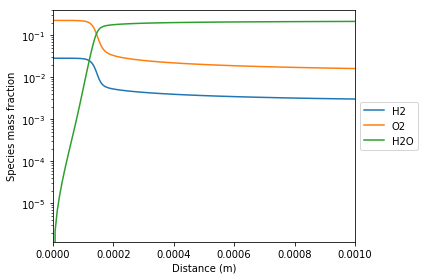

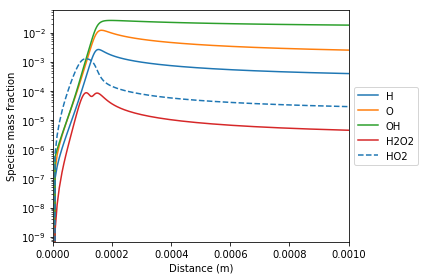

Reaction zone pulse width (exothermic length) = 4.383e-05 m
Reaction zone induction length = 0.0001444 m
Reaction zone pulse time (exothermic time) = 8.516e-08 s
Reaction zone induction time = 3.811e-07 s


In [11]:
from sdtoolbox.postshock import CJspeed, PostShock_fr
from sdtoolbox.znd import zndsolve
from sdtoolbox.utilities import CJspeed_plot, znd_plot, znd_fileout
import cantera as ct

P1 = 100000 
T1 = 300
q = 'H2:2 O2:1 N2:3.76'
mech = 'Mevel2017.cti'
file_name = 'h2air'

# Find CJ speed and related data, make CJ diagnostic plots
cj_speed,R2,plot_data = CJspeed(P1,T1,q,mech,fullOutput=True)
CJspeed_plot(plot_data,cj_speed)

# Set up gas object
gas1 = ct.Solution(mech)
gas1.TPX = T1,P1,q

# Find post shock state for given speed
gas = PostShock_fr(cj_speed, P1, T1, q, mech)

# Solve ZND ODEs, make ZND plots
znd_out = zndsolve(gas,gas1,cj_speed,t_end=1e-5,advanced_output=True)
znd_plot(znd_out,maxx=0.001,
         major_species=['H2', 'O2', 'H2O'],
         minor_species=['H', 'O', 'OH', 'H2O2', 'HO2'])
         
print('Reaction zone pulse width (exothermic length) = %.4g m' % znd_out['exo_len_ZND'])
print('Reaction zone induction length = %.4g m' % znd_out['ind_len_ZND'])
print('Reaction zone pulse time (exothermic time) = %.4g s' % znd_out['exo_time_ZND'])
print('Reaction zone induction time = %.4g s' % znd_out['ind_time_ZND'])


# Applications

The reaction mechanisms and thermodynamic data needed to run the demonstration programs are included with the zip archive as .cti files or can be downloaded individually from the SDT website

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_CJ.py">demo_CJ.py</a> <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_CJ.m">demo_CJ.m</a> Computes CJ speed.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_CJ_and_shock_state.py">demo_CJ_and_shock_state.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_CJ_and_shock_state.m">demo_CJ_and_shock_state.m</a>  Computes 2 reflection conditions.
    * equilibrium post-initial-shock state behind a shock traveling at CJ speed (CJ state) followed by equilibrium post-reflected-shock state
    * frozen post-initial-shock state behind a CJ wave followed by frozen                                 post-reflected-shock state

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_CJstate.py">demo_CJstate.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_CJstate.m">demo_CJstate.m</a>  Computes CJ speed and CJ state.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_CJstate_isentrope.py">demo_CJstate_isentrope.py</a> <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_CJstate_isentrope.m">demo_CJstate_isentrope.m</a> Computes CJ speed, CJ state, isentropic expansion in 1-D Taylor wave, plateau state conditions.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_cv_comp.py">demo_cv_comp.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_cv_comp.m">demo_cv_comp.m</a>  Generates plots and output files for a constant volume  explosion simulation where the initial conditions are adiabaically compressed reactants.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_cvCJ.py">demo_cvCJ.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_cvCJ.m">demo_cvCJ.m</a>  Generates plots and output files for a constant volume  explosion simulation where the initial conditions are given by the postshock conditions for a CJ speed shock wave.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_cvshk.py">demo_cvshk.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_cvshk.m">demo_cvshk.m</a>  Generates plots and output files for a constant volume  explosion simulation where the initial conditions are given by the postshock conditions for shock wave traveling at a user specified speed.

*  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_detonation_pu.py">demo_detonation_pu.py</a>    <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_detonation_pu.m">demo_detonation_pu.m</a>    Computes the Hugoniot and pressure-velocity $(P-U)$ relationship for shock waves centered on the CJ state. Generates an output file.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_equil.py">demo_equil.py</a>     <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_equil.m">demo_equil.m</a>    Computes the equilibrium state at constant $(T,P)$ over a range of temperature for a fixed pressure and plots composition.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_EquivalenceRatioSeries.py">demo_EquivalenceRatioSeries.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_EquivalenceRatioSeries.m">demo_EquivalenceRatioSeries.m</a> - An example of how to vary the equivalence ratio over a specified range and for each resulting composition, compute constant volume explosion and ZND detonation structure.  This example creates a set of plots and an output file.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_exp_state.py">demo_exp_state.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_exp_state.m">demo_exp_state.m</a> Calculates mixture properties for explosion states (UV,HP, TP).

*  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_ExplosionSeries.py">demo_ExplosionSeries.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_ExplosionSeries.m">demo_ExplosionSeries.m</a>   How to compute                                       basic explosion parameters as a functionof concentration of one component for                                       given mixture.  Creates plots and output file.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_g.py">demo_g.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_g.m">demo_g.m</a> Compares methods of computing ratio of specific heats and logarithmic isentrope slope using several approaches and compares the results graphically.




* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_GasPropAll.py">demo_GasPropAll.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_GasPropAll.m">demo_GasPropAll.m</a> Mixture thermodynamic and transport properties of gases at fixed pressure as a function of temperature. Edit to choose either frozen or equilibrium composition state.  The mechanism file must contain transport parameters
for each species and specify the transport model 'Mix'.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_oblique.py">demo_oblique.py</a> <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_oblique.m">demo_oblique.m</a> Calculates shock polar using  FROZEN post-shock state  based the initial gas properties and the shock speed.  Plots shock polar
 using three different sets of coordinates.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_overdriven.py">demo_overdriven.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_overdriven.m">demo_overdriven.m</a>  Computes
detonation and reflected shock wave pressure for overdriven waves. Both the post-initial-shock and the post-reflected-shock states are equilibrium states. Creates output file.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_OverdriveSeries.py">demo_OverdriveSeries.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_OverdriveSeries.m">demo_OverdriveSeries.m</a>  This is a demonstration of how to vary the Overdrive ($U/U_{CJ})$) in a loop for constant volume explosions and ZND detonation
    simulations.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_PrandtlMeyer.py">demo_PrandtlMeyer.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_PrandtlMeyer.m">demo_PrandtlMeyer.m</a> Calculates Prandtl-Meyer function and polar.  Creates plots of polars.

*  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_PrandtlMeyer_CJ.py">demo_PrandtlMeyer_CJ.py</a> <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_PrandtlMeyer_CJ.m">demo_PrandtlMeyer_CJ.m</a> Calculates Prandtl-Meyer function and polar expanded from CJ state.  Creates plots of polars and fluid element trajectories.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_PrandtlMeyerDetn.py">demo_PrandtlMeyerDetn.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_PrandtlMeyerDetn.m">demo_PrandtlMeyerDetn.m</a> Calculates Prandtl-Meyer function and polar  originating from CJ state. Calculates oblique shock wave moving into
   expanded detonation products or a specified bounding atmosphere.  Creates a set of plots, evaluates axial flow model for rotating detonation engine.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_PrandtlMeyerLayer.py">demo_PrandtlMeyerLayer.py</a>
<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_PrandtlMeyerLayer.m">demo_PrandtlMeyerLayer.m</a>
Calculates Prandtl-Meyer function and polar originating from lower layer
postshock state. Calculates oblique shock wave moving into expanded
detonation products or a specified bounding atmosphere.  Two-layer version
with arbitrary flow in lower layer (1), oblique wave in upper layer (2).
Upper and lower layers can have various compositions as set by user.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_precompression_detonation.py">demo_precompression_detonation.py</a> <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_precompression_detonation.m">demo_precompression_detonation.m</a> Computes detonation and reflected shock  wave pressure for overdriven waves. Varies density of initial state and detonation wave speed. Creates an output file.

*  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_PressureSeries.py">demo_PressureSeries.py</a>
<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_PressureSeries.m">demo_PressureSeries.m</a>
Properties computed as a function of initial pressure for a constant volume explosions and ZND detonation simulations Creates a set of plots and an output file.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_PSeq.py">demo_PSeq.py</a> <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_PSeq.m">demo_PSeq.m</a> Calculates the equilibrium post shock state based on the initial gas state and the shock speed.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_PSfr.py">demo_PSfr.py</a> <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_PSfr.m">demo_PSfr.m</a> Calculates the frozen postshock state based on the initial gas state and the shock speed.



* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_quasi1d_eq.py">demo_quasi1d_eq.py</a> <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_quasi1d_eq.m">demo_quasi1d_eq.m</a> Computes ideal quasi-one dimensional flow using equilibrium properties to determine exit conditions for expansion to a specified pressure.  Carries out computation for a range of helium dilutions.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_reflected_eq.py">demo_reflected_eq.py</a> <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_reflected_eq.m">demo_reflected_eq.m</a> Calculates post-relected-shock state for a specified shock speed speed and a specified initial mixture.  In this demo, both shocks are reactive, i.e. the computed states behind both the incident and reflected shocks are equilibrium states.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_reflected_fr.py">demo_reflected_fr.py</a> <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_reflected_fr.m">demo_reflected_fr.m</a> Calculates post-relected-shock state for a specified shock speed speed and a specified initial mixture.  In this demo, both shocks are frozen, i.e. there is no composition change across the incident and reflected shocks.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_RH.py">demo_RH.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_RH.m">demo_RH.m</a> Creates arrays for Rayleigh Line
with specified shock speed, Reactant, and Product Hugoniot Curves for H$_2$-air mixture.  Options to creates output file and plots.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_RH_air.py">demo_RH_air.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_RH_air.m">demo_RH_air.m</a> Creates arrays for
Rayleigh Line with specified shock speed and frozen Hugoniot Curve for a
shock wave in air.  Options to create output file and plot.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_RH_air_eq.py">demo_RH_air_eq.py</a>    <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_RH_air_eq.m">demo_RH_air_eq.m</a>   Creates arrays
for Rayleigh Line with specified shock speed in air, frozen and equilibrium Hugoniot curves. Options to create output file and plot.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_RH_air_isentropes.py">demo_RH_air_isentropes.py</a>
<a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_RH_air_isentropes.m">demo_RH_air_isentropes.m</a>
Creates arrays for frozen Hugoniot curve for shock wave in air, Rayleigh Line with specified shock speed, and four representative isentropes.  Options to create plot and output file.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_RH_CJ_isentropes.py">demo_RH_CJ_isentropes.py</a>
 <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_RH_CJ_isentropes.m">demo_RH_CJ_isentropes.m</a>
Creates plot for equilibrium product Hugoniot curve near CJ point, Shows
Rayleigh Line with slope $U_{CJ}$ and four isentropes bracketing CJ point. Creates plot showing Gruneisen coefficient, denominator in Jouguet's rule, isentrope
slope.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_rocket_impulse.py">demo_rocket_impulse.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_rocket_impulse.m">demo_rocket_impulse.m</a>  Computes rocket performance using quasi-one dimensional isentropic flow using  both frozen and equilibrium properties for a range of helium dilutions in a hydrogen-oxygen mixture.  Plots impulse as a function of dilution.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_RZshock.py">demo_RZshock.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_RZshock.m">demo_RZshock.m</a> Generate plots and output files for a reaction zone behind a shock front traveling at a user specified speed.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_shock_adiabat.py">demo_shock_adiabat.py</a>    <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_shock_adiabat.m">demo_shock_adiabat.m</a>   Generates the points on a frozen shock adiabat and creates an output file.



*  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_shock_point.py">demo_shock_point.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_shock_point.m">demo_shock_point.m</a>   This is a demonstration of how to compute frozen and equilibrium postshock  conditions for a single shock Mach number. Computes transport properties and thermodynamic states.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_shock_state_isentrope.py">demo_shock_state_isentrope.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_shock_state_isentrope.m">demo_shock_state_isentrope.m</a>  Computes frozen post-shock state and isentropic expansion for specified shock speed.  Create plots and output file.

    * <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_ShockTube.py">demo_ShockTube.py</a>   <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_ShockTube.m">demo_ShockTube.m</a>   Calculates the solution to ideal shock tube problem. Three cases possible:
    * conventional nonreactive driver (gas),
    * constant volume combustion driver (uv),
    * CJ detonation (initiate at diaphragm) driver (cj).

*  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_STGshk.py">demo_STGshk.py</a> <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_STGshk.m">demo_STGshk.m</a> Generate plots and output files for a steady reaction zone between a shock and a blunt body using the model of linear profile of mass flux $\rho u$ on stagnation streamline.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_STG_RZ.py">demo_STG_RZ.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_STG_RZ.m">demo_STG_RZ.m</a> Compare propagating shock and stagnation point profiles using transformation methodology of Hornung.

*  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_TP.py">demo_TP.py</a> <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_TP.m">demo_TP.m</a> Explosion computation simulating constant temperature and pressure reaction.  Reguires function \texttt{tpsys.m</a> for ODE solver

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_TransientCompression.py">demo_TransientCompression.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_TransientCompression.m">demo_TransientCompression.m</a> Explosion computation simulating adiabatic compression ignition with
 control volume approach and effective piston used for compression.
 Requires $\textrm{adiasys.m}$  function for ODE solver.

*  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_vN_state.m">demo_vN_state.m</a> Calculates the frozen shock (vN = von Neumann) state of the gas behind the leading shock wave in a CJ detonation.

*  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_vN_state.py">demo_vN_state.py</a> <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_ZNDCJ.m">demo_ZNDCJ.m</a> Solves ODEs for ZND model of detonation structure.  Generate plots and output files for a for a shock front traveling at the CJ speed.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_ZNDCJ.py">demo_ZNDCJ.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_ZNDshk.m">demo_ZNDshk.m</a> Solves ODEs for ZND model of detonation structure. Generate plots and output files for a for a shock front traveling at a user specified speed $U$.

* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/Python3/demo/demo_ZNDshk.py">demo_ZNDshk.py</a>  <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/MATLAB/Demo/demo_ZND_CJ_cell.m">demo_ZND_CJ_cell.m</a>  Computes ZND and CV models of detonation with the shock front
 traveling at the CJ speed.  Evaluates various measures of the reaction
 zone thickness and exothermic pulse width, effective activation energy
 and Ng stability parameter.  Estimates cell size using three correlation methods: Westbrook; Gavrikov et al; and Ng et al.


# Shock and Detonation Toolbox Resources


## SDT home page 
The SDT home page is located on the <a href="http://shepherd.caltech.edu/EDL/">Explosion Dynamics Laboratory</a> site under the Public Resources page at http://shepherd.caltech.edu/EDL/PublicResources/sdt/

## Downloads
Python and Matlab libraries and demonstration programs can be downloaded as <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox.zip">(ZIP)</a> archives.   Installation instructions are available in a <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/SDToolbox/sdt-install.pdf">(PDF)</a> file.

## Quick reference
Quick reference to SDT functions and demonstation programs <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/doc/QuickReferenceSDT.pdf">(PDF)</a> 

## Reaction mechanisms 
* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/cti_mech.html"> Cantera format (.CTI) data sets </a>

## Thermodynamic data and tools
* <a href="http://shepherd.caltech.edu/EDL/PublicResources/sdt/thermo.html">  Thermodynamic data sources and software tools </a>

